In [32]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import requests
from bs4 import BeautifulSoup

## WEB SCRAPING and EDA ASSIGNMENT by IBRAHIM PAUL JENOM

# SECTION A. Getting the Data from the Web

In [2]:
# Sending a request to the website
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'
response = requests.get(url)

In [3]:
# Checking if response was successful
if response.status_code == 200:
    print('Response successful')
else:
    print('Response failed')

Response successful


In [4]:
# Parsing the html content
page = BeautifulSoup(response.text, 'html.parser')

In [66]:
# Displaying the first few lines of the page
print('\n'.join(page.prettify().splitlines()[:10]))

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of largest companies in the United States by revenue - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinne

In [68]:
# Getting the first table in the web page
table = page.find_all('table')[0]

In [69]:
# Displaying the first few lines of the table
print('\n'.join(table.prettify().splitlines()[:10]))

<table class="wikitable sortable">
 <caption>
 </caption>
 <tbody>
  <tr>
   <th>
    Rank
   </th>
   <th>
    Name


In [7]:
# Getting the table headers
table_titles = table.find_all('th')
table_titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [8]:
world_table_titles = [title.text.strip() for title in table_titles]
world_table_titles

['Rank',
 'Name',
 'Industry',
 'Revenue (USD millions)',
 'Revenue growth',
 'Employees',
 'Headquarters']

In [9]:
# Creating a Dataframe
df = pd.DataFrame(columns=world_table_titles)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [73]:
# Getting the columns data
column_data = table.find_all('tr')

In [72]:
# Displaying first few rows of the columns
for row in column_data[:1]:  # Adjust the number of rows you want to see
    print(row)

<tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>


In [11]:
# Adding the data into the column headers
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    length = len(df)
    df.loc[length] = individual_row_data

In [12]:
# Displaying the DataFrame
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,"45,735",11.8%,"16,023","New York City, New York"
96,97,CHS,Agriculture cooperative,"45,590",-4.6%,"10,609","Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
98,99,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"


# SECTION B. Exploratory Data Analysis

In [13]:
# Displayong the first few rows
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"


In [14]:
# Displaying the last few rows
df.tail()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
95,96,TIAA,Financials,"45,735",11.8%,"16,023","New York City, New York"
96,97,CHS,Agriculture cooperative,"45,590",-4.6%,"10,609","Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
98,99,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"
99,100,Best Buy,Retail,"43,452",-6.1%,"85,000","Richfield, Minnesota"


In [15]:
# Describing the dataset
df.describe()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
count,100,100,100,100,100,100,100
unique,100,100,37,98,96,98,71
top,1,Walmart,Financials,"54,317",-3.6%,"45,000","New York City, New York"
freq,1,1,13,2,2,2,13


In [16]:
# Getting information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    object
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: object(7)
memory usage: 6.2+ KB


In [26]:
# Changing the Revenue (USD millions) and Revenue growth columns to float datatype
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].str.replace('$', '').str.replace(',', '').astype(float)
df['Revenue growth'] = df['Revenue growth'].str.replace('%', '').astype(float)

In [28]:
# Changing the Employees column to integer datatype
df['Employees'] = df['Employees'].str.replace(',', '').astype(int)

In [29]:
# Cgecking to confirm change in datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    100 non-null    object 
 1   Name                    100 non-null    object 
 2   Industry                100 non-null    object 
 3   Revenue (USD millions)  100 non-null    float64
 4   Revenue growth          100 non-null    float64
 5   Employees               100 non-null    int64  
 6   Headquarters            100 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 6.2+ KB


In [17]:
# Checking for null values in the Dataset
df.isnull().sum()

,0
Rank,0
Name,0
Industry,0
Revenue (USD millions),0
Revenue growth,0
Employees,0
Headquarters,0


In [18]:
# Checking the columns of the dataset
df.columns

Index(['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth',
       'Employees', 'Headquarters'],
      dtype='object')

# SECTION C. Answering Questions About the Dataset


## Question 1. What are the Top 10 Companies with the Highest Revenue

In [31]:
# Top 10 countries with the highest revenue
Top_10 = df.sort_values('Revenue (USD millions)', ascending=False).head(10)
Top_10

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,648125.0,6.0,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,574785.0,11.9,1525000,"Seattle, Washington"
2,3,Apple,Electronics industry,383482.0,-2.8,161000,"Cupertino, California"
3,4,UnitedHealth Group,Healthcare,371622.0,14.6,440000,"Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,364482.0,20.7,396500,"Omaha, Nebraska"
5,6,CVS Health,Healthcare,357776.0,10.9,259500,"Woonsocket, Rhode Island"
6,7,ExxonMobil,Petroleum industry,344582.0,-16.7,61500,"Spring, Texas"
7,8,Alphabet,Technology and cloud computing,307394.0,8.7,182502,"Mountain View, California"
8,9,McKesson Corporation,Health,276711.0,4.8,48000,"Irving, Texas"
9,10,Cencora,Pharmacy wholesale,262173.0,9.9,44000,"Conshohocken, Pennsylvania"


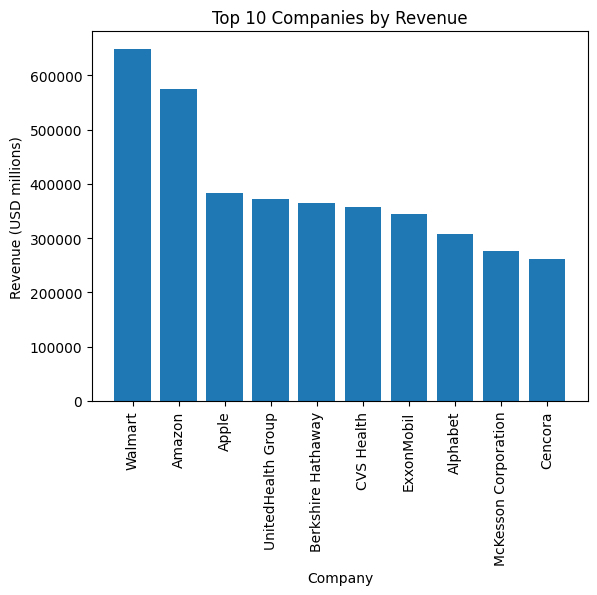

In [34]:
# Using a Bar chat to show the Top 10 companies
plt.bar(Top_10['Name'], Top_10['Revenue (USD millions)'])
plt.xlabel('Company')
plt.ylabel('Revenue (USD millions)')
plt.title('Top 10 Companies by Revenue')
x_axis = np.arange(len(Top_10['Name']))
plt.xticks(x_axis, Top_10['Name'], rotation=90)
plt.show()

## Question 2. What are the Top 10 companies with the highest Revenue Growth

In [35]:
# Top 10 Companies with the highest Revenue growth
Top_10_growth = df.sort_values('Revenue growth', ascending=False).head(10)
Top_10_growth

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
64,65,Nvidia,Technology,60922.0,125.9,29600,"Santa Clara, California"
34,35,Goldman Sachs,Financials,108418.0,57.8,45300,"New York City, New York"
20,21,Citigroup,Financials,156820.0,55.1,237925,"New York City, New York"
11,12,JPMorgan Chase,Financial services,239425.0,54.7,309926,"New York City, New York"
17,18,Bank of America,Financials,171912.0,49.4,212985,"Charlotte, North Carolina"
40,41,Morgan Stanley,Financials,96194.0,45.9,80006,"New York City, New York"
33,34,Wells Fargo,Financials,115340.0,39.2,226000,"San Francisco, California"
90,91,Capital One Financial,Financials,49484.0,29.0,51987,"Richmond, Virginia"
61,62,Progressive Corporation,Insurance,62109.0,25.2,61432,"Mayfield Village, Ohio"
35,36,Freddie Mac,Financials,108050.0,24.6,8020,"McLean, Virginia"


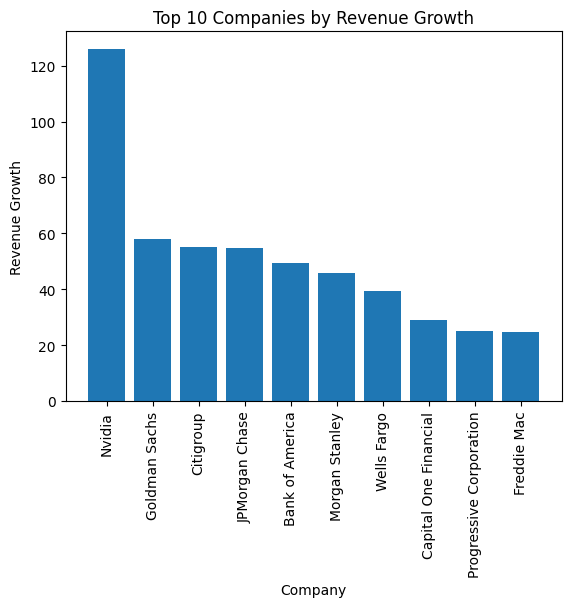

In [36]:
# Bar Chat showing the Top 10 countries with the highest Revenue Growth
plt.bar(Top_10_growth['Name'], Top_10_growth['Revenue growth'])
plt.xlabel('Company')
plt.ylabel('Revenue Growth')
plt.title('Top 10 Companies by Revenue Growth')
x_axis = np.arange(len(Top_10_growth['Name']))
plt.xticks(x_axis, Top_10_growth['Name'], rotation=90)
plt.show()

## Question 3. Which Industry Type have the most number companies in the Top 100

In [47]:
# Industry with the most count of companies in the in the dataset
top_industry = df['Industry'].value_counts().head(5)
top_industry

,count
Industry,
Financials,13
Retail,10
Petroleum industry,9
Pharmaceutical industry,6
Technology,6


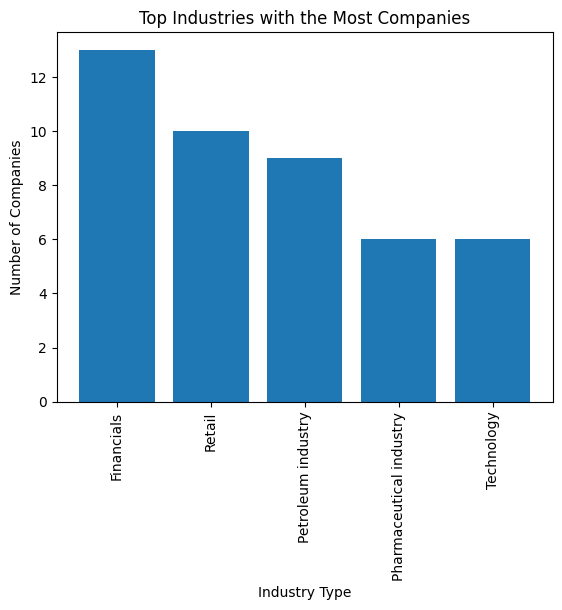

In [49]:
# Plotting a Bar chat to show the Top Industries
plt.bar(top_industry.index, top_industry.values)
plt.xlabel('Industry Type')
plt.ylabel('Number of Companies')
plt.title('Top Industries with the Most Companies')
plt.xticks(rotation=90)
plt.show()

## Question 4. What are the Top Industries with the Highest cummulative Revenue

In [59]:
# Top 5 indusries with the highest cummulative Revenue
top_industries_revenue = df.groupby('Industry')['Revenue (USD millions)'].sum().sort_values(ascending=False).head(5)
top_industries_revenue

,Revenue (USD millions)
Industry,
Retail,1615484.0
Healthcare,1324717.0
Financials,1279132.0
Petroleum industry,1220316.0
Technology and cloud computing,581169.0


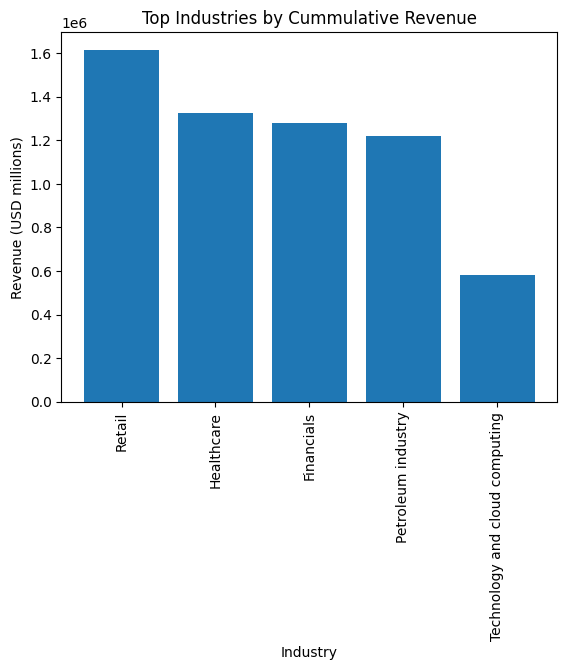

In [60]:
# Plotting a bar chat to show the Top industries by cummulated revenue
plt.bar(top_industries_revenue.index, top_industries_revenue.values)
plt.xlabel('Industry')
plt.ylabel('Revenue (USD millions)')
plt.title('Top Industries by Cummulative Revenue')
plt.xticks(rotation=90)
plt.show()

## Question 5. What are the Cities with the most number of companies in the Top 100

In [52]:
# States with the highest count of Companies in the dataset
top_states = df['Headquarters'].value_counts().head(5)
top_states

,count
Headquarters,
"New York City, New York",13
"Houston, Texas",6
"Atlanta, Georgia",4
"Austin, Texas",2
"Dallas, Texas",2


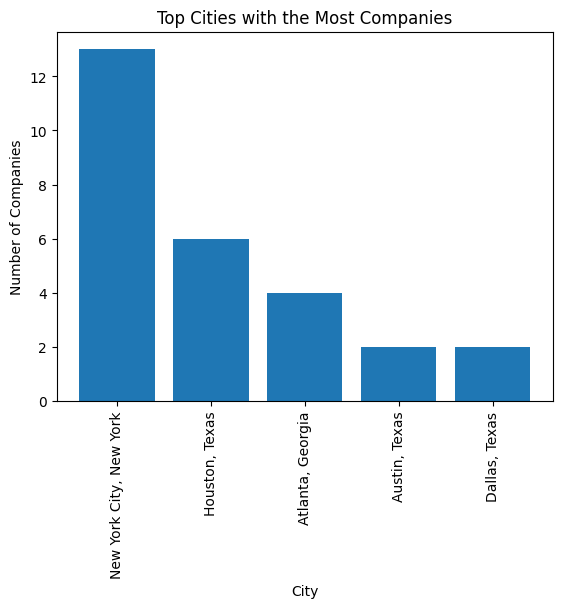

In [63]:
# Plotting a Bar chat to show the Top cities
plt.bar(top_states.index, top_states.values)
plt.xlabel('City')
plt.ylabel('Number of Companies')
plt.title('Top Cities with the Most Companies')
plt.xticks(rotation=90)
plt.show()

## Question 6. What are the Top 5 Cities based on cummulative revenue

In [61]:
# Top 5 states by cummulate Revenue
top_states_revenue = df.groupby('Headquarters')['Revenue (USD millions)'].sum().sort_values(ascending=False).head(5)
top_states_revenue

,Revenue (USD millions)
Headquarters,
"New York City, New York",1180312.0
"Bentonville, Arkansas",648125.0
"Houston, Texas",584165.0
"Seattle, Washington",574785.0
"Cupertino, California",383482.0


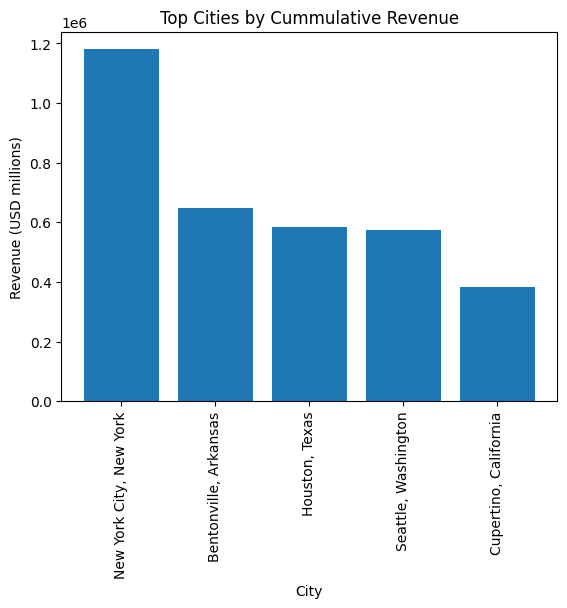

In [64]:
# Bar chat displaying the top 5 states by cummulative revenue
plt.bar(top_states_revenue.index, top_states_revenue.values)
plt.xlabel('City')
plt.ylabel('Revenue (USD millions)')
plt.title('Top Cities by Cummulative Revenue')
plt.xticks(rotation=90)
plt.show()

## Question 7. What are the Top companies with the highest number of Employees

In [54]:
# Top 10 companies with the highest number of Employees
top_employees = df.sort_values('Employees', ascending=False).head(10)
top_employees

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,648125.0,6.0,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,574785.0,11.9,1525000,"Seattle, Washington"
22,23,The Home Depot,Retail,152669.0,-3.0,463100,"Atlanta, Georgia"
45,46,FedEx,Transportation,90155.0,-3.6,446400,"Memphis, Tennessee"
3,4,UnitedHealth Group,Healthcare,371622.0,14.6,440000,"Minnetonka, Minnesota"
36,37,Target Corporation,Retail,107412.0,-1.6,415000,"Minneapolis, Minnesota"
24,25,Kroger,Retail,150039.0,-3.6,414000,"Cincinnati, Ohio"
4,5,Berkshire Hathaway,Conglomerate,364482.0,20.7,396500,"Omaha, Nebraska"
44,45,United Parcel Service,Transportation,90958.0,-9.3,382550,"Atlanta, Georgia"
79,80,TJX,Retail,49936.0,2.9,329000,"Framingham, Massachusetts"


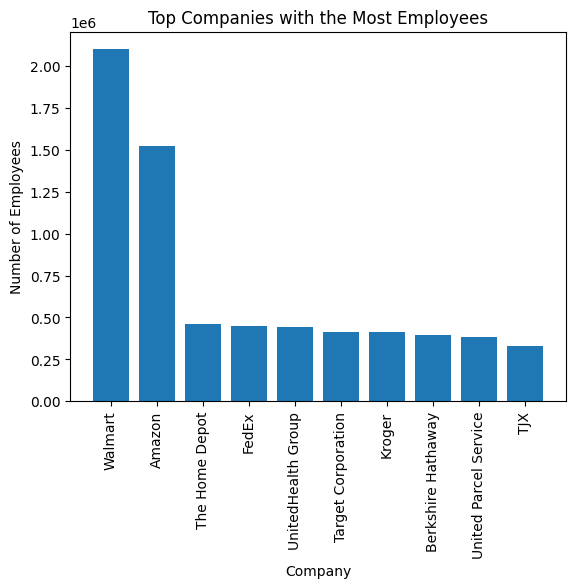

In [55]:
# Plotting a bar chat to show the companies with the most employees
plt.bar(top_employees['Name'], top_employees['Employees'])
plt.xlabel('Company')
plt.ylabel('Number of Employees')
plt.title('Top Companies with the Most Employees')
plt.xticks(rotation=90)
plt.show()

## SECTION D. SUMMARY OF FINDINGS



1. The Top 3 comapnies with the highest revenue are Walmart, Amazon and Apple
2. The Top 3 companies by revenue growth are Nividia, Goldman Sachs and Citigroup
3. The Top 3 Industry Type that have the most number companies in the Top 100 are Financials, Retail and Petroleum Industry
4. This is different for the Top Industries with the Highest cummulative Revenue as they include Retail, Healthcare and Financials
5. In the Top 100, the Cities with the most number of companies are New york city(New york), Houston(Texas), Atlanta(Gorgia)
6. In the Top 100, the Top 3 Cities based on cummulative revenue are New york city(New york), Houston(Texas), Bentonville(Arkansas)
7. The Top companies with the highest number of Employees are Walmart, Amazon and Home Depot

